In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Öncelikle belirmek isterimki verileri kendi elimle oluşturdum. Zamanında çocukken oyun oynadığım mahallede ve çevre mahallerinde çocuklar ellerindeki bilye ve taso sayısına göre saygı görürdü (evet komik ve çocukça). Bende bunu neden analiz edip makine öğrenmesi teknikleriyle tahmin etmiyorum ki diye düşündüm. Ne de olsa literatürde böyle bir çalılma yok, OLDUKÇA ÖZGÜN.

In [4]:
#verimizi okuyalım
df = pd.read_csv('CocukSaygiTahmin.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CocukID       444 non-null    int64 
 1   Cinsiyet      444 non-null    object
 2   Yas           444 non-null    int64 
 3   BilyeSayisi   444 non-null    int64 
 4   TasoSayisi    444 non-null    int64 
 5   SaygiGordumu  444 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 20.9+ KB


#### Cinsiyet Dağılımı =>

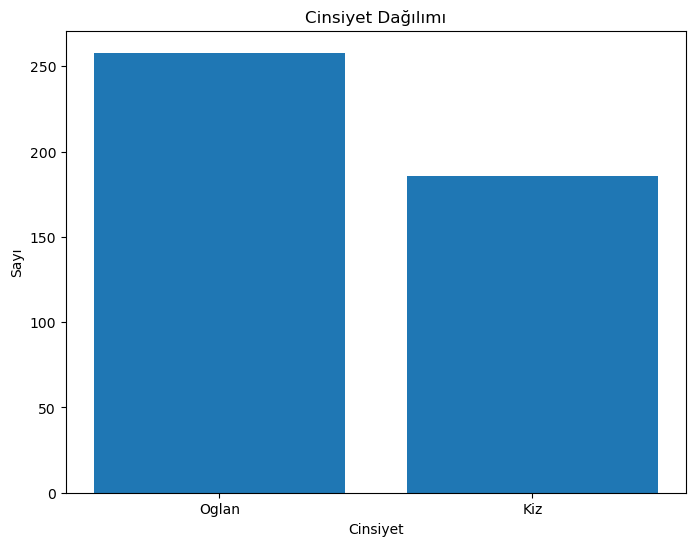

In [6]:
# Çocuklar arası cinsiyet dağılımına bakalım
cinsiyet_dagilimi = df['Cinsiyet'].value_counts()

# Histogramı çizdirelim
plt.figure(figsize=(8, 6))
plt.bar(cinsiyet_dagilimi.index, cinsiyet_dagilimi.values)
plt.xlabel('Cinsiyet')
plt.ylabel('Sayı')
plt.title('Cinsiyet Dağılımı')
plt.show()

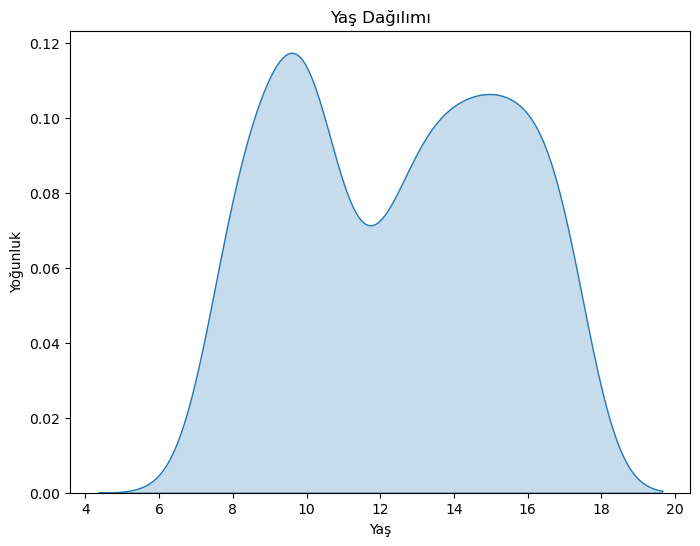

In [5]:
import seaborn as sns
# Yaş dağılımını daha iyi anlamak için yoğunluk grafiği çizdirelim
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Yas'], fill=True)
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.title('Yaş Dağılımı')
plt.show()

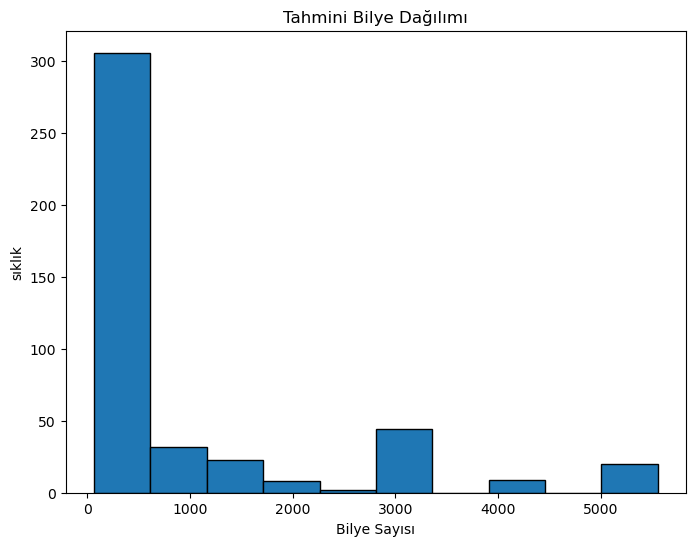

In [6]:
# Çocukların sahip olduğu tahmini bilye dağılımını çizelim 
plt.figure(figsize=(8, 6))
plt.hist(df['BilyeSayisi'], bins=10, edgecolor='black')
plt.xlabel('Bilye Sayısı')
plt.ylabel('sıklık')
plt.title('Tahmini Bilye Dağılımı')
plt.show()

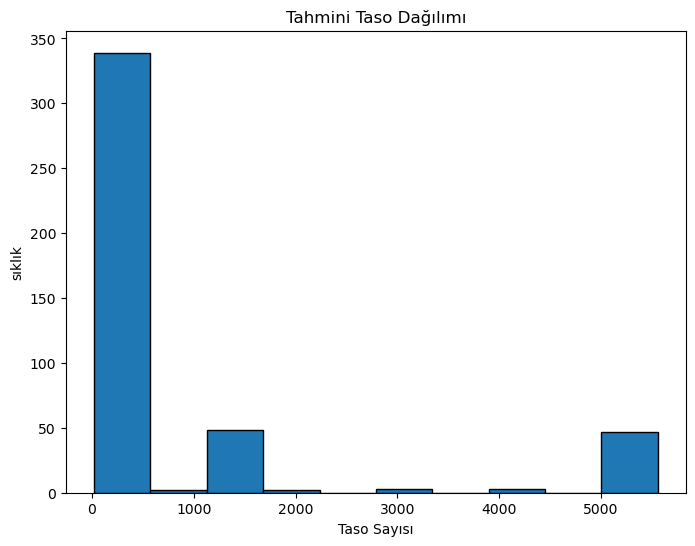

In [7]:
# Çocukların sahip olduğu tahmini taso dağılımını çizelim
plt.figure(figsize=(8, 6))
plt.hist(df['TasoSayisi'], bins=10, edgecolor='black')
plt.xlabel('Taso Sayısı')
plt.ylabel('sıklık')
plt.title('Tahmini Taso Dağılımı')
plt.show()

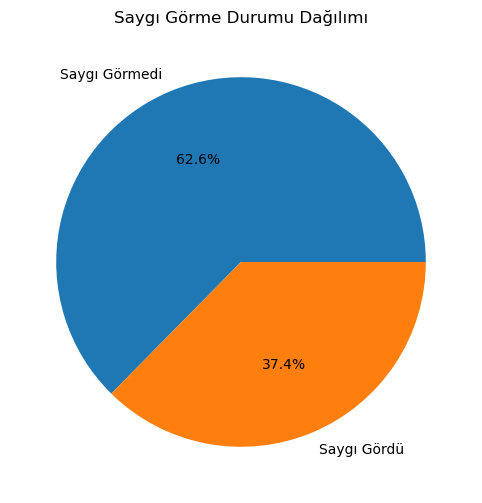

In [8]:
# Saygı görme oranlarını Yüzdelik olarak hesaplıyoruz
saygi_dagilimi = df['SaygiGordumu'].value_counts(normalize=True) * 100

# Saygı görme etiketlerini yazıyoruz
etiketler = [ 'Saygı Görmedi','Saygı Gördü']

# Pasta grafiğini çizdiriyoruz
plt.figure(figsize=(8, 6))
plt.pie(saygi_dagilimi, labels=etiketler, autopct='%1.1f%%')
plt.title('Saygı Görme Durumu Dağılımı')
plt.show()

In [9]:
X = df.iloc[ : , [ 2 , 4]].values
y = df.iloc[: , 5].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
classifer.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_pred = classifer.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  0]
 [ 2 58]]


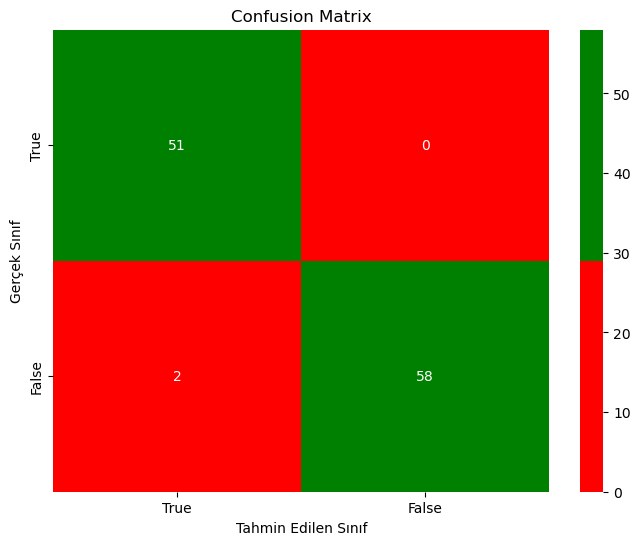

In [15]:
classes = ['True', 'False']
colors = ['red', 'green']

# Heatmap'i çizdirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=colors, xticklabels=classes, yticklabels=classes)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Confusion Matrix')
plt.show()